In [1]:
%load_ext sql


In [2]:
%sql sqlite:///C:/sqlite/chinook.db

# 1) The Order of Execution

In this lesson we'll learn how to use joins with the following clauses:

* `LIMIT`

* `WHERE`

* `GROUP BY`

* `JOIN` (more than two tables)

Before we begin, let's learn the order of the execution of clauses in the following abstract query.

```sql
SELECT *
  FROM a_table
  JOIN another_table
    ON a_table.some_column = another_table.some_column;
```

The clauses `FROM`, `JOIN` and `ON` together always run first.

We already know that LIMIT is the last clause in the order of execution. As we mentioned above, FROM, JOIN, and ON run first (in this order); therefore, the order of execution of the query above is as follows:

1. FROM

1. JOIN

1. ON

1. SELECT

1. LIMIT


In [3]:
%%sql
SELECT *
FROM invoice_line
JOIN track
    ON invoice_line.track_id = track.track_id
LIMIT 3

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id_1,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_1
1,1,1158,0.99,1,1158,Right Next Door to Hell,91,2,1,None,182321,3175950,0.99
2,1,1159,0.99,1,1159,Dust N' Bones,91,2,1,None,298374,5053742,0.99
3,1,1160,0.99,1,1160,Live and Let Die,91,2,1,None,184016,3203390,0.99


# 2) Database Schemas

The FROM, JOIN, and ON clauses run first, and they run together. We can think of their result as a new, temporary table: one that isn't part of the database, but from which we're selecting data.

In code, you can think of . . .

```sql
SELECT *
  FROM a_table
  JOIN another_table
    ON a_table.some_column = another_table.some_column;
```
. . . as being the same as . . .

```sql
SELECT *
  FROM some_table
```

. . . where `some_table` is the result of joining `a_table` with `another_table`.

From here, we can now include clauses like `LIMIT`, `WHERE`, `GROUP BY`, `JOIN`, and so on in the second query above. The only difference is that, when using column names, we should specify from which table they come.

The relations between the tables are stored in a **database schema**. A database schema is the plan that defines the data organization into tables — and how the tables relate among them. Code usually defines these schemas, and diagrams usually represent them visually.

Here is a diagram that represents all the relations in the Chinook database:

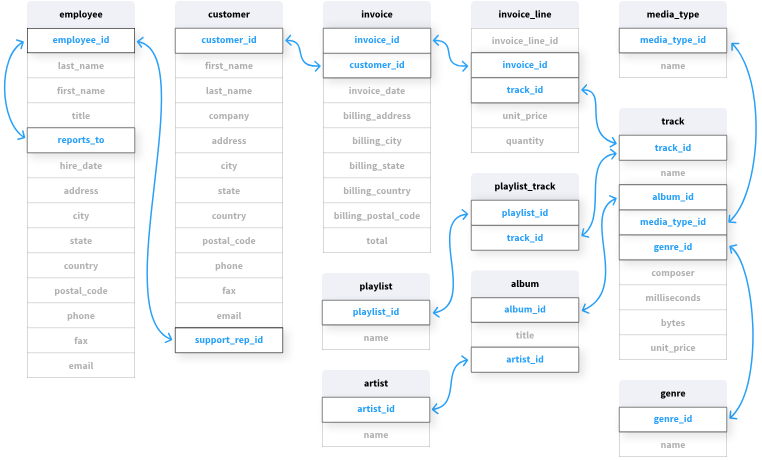

# 3) Joining and WHERE

Including a WHERE to the previous example gives us . . .

```sql
SELECT *
  FROM some_table
 WHERE condition;
```
Replacing back `some_table` with the joining of tables that originates it takes us to . . 

```sql
SELECT *
  FROM a_table
  JOIN another_table
    ON a_table.some_column = another_table.some_column
 WHERE condition;
```

## Instructions

Note the following relation

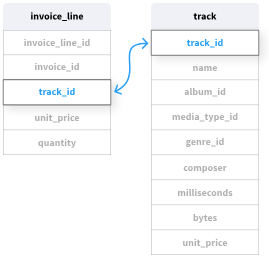

1. Join `invoice_line` and `track`, and filter the results for those rows whose `invoice_id` is 19.

In [4]:
%%sql

SELECT *
FROM invoice_line
JOIN track
   ON invoice_line.track_id = track.track_id
WHERE invoice_line.invoice_id = 19

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id_1,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_1
134,19,105,0.99,1,105,The Worm,11,1,4,"Cornell, Commerford, Morello, Wilk",237714,7710800,0.99
135,19,2669,0.99,1,2669,Get Off Of My Cloud,216,1,1,Jagger/Richards,176013,5719514,0.99
136,19,1784,0.99,1,1784,I Wish It Would Rain,146,1,14,Barrett Strong/Norman Whitfield/Roger Penzabene,172486,5647327,0.99
137,19,3460,0.99,1,3460,Love Is a Losing Game,321,2,14,None,154386,2509409,0.99
138,19,2640,0.99,1,2640,Soul Kitchen,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Jim Morrison",215066,7040865,0.99
139,19,1310,0.99,1,1310,Wasting Love,103,1,1,None,336953,8091301,0.99
140,19,2510,0.99,1,2510,Get On The Snake,203,1,1,Chris Cornell/Kim Thayil,225123,7313744,0.99


# 4) Joining and GROUP BY

Now that we understand how this works, let's use `GROUP BY` together with `JOIN`.

The `genre` column will include all `genres` available in the Chinook database, and the `num_of_tracks` column will display the number of available tracks for the genre on the same row.

## Instructions
 
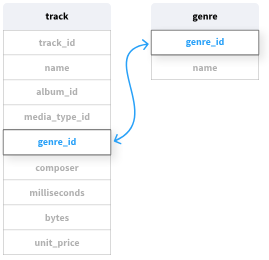

1. Write a query that does the following:

* Joins `genre` and `track`

* Selects `genre.name` aliased as `genre`

* Groups by `genre.name`

* Counts the number of tracks for each group on a column called `num_of_tracks`.


In [5]:
%%sql
SELECT genre.name as genre, COUNT(*) as num_of_tracks
FROM track
JOIN genre
   ON track.genre_id = genre.genre_id
GROUP BY genre.name

 * sqlite:///C:/sqlite/chinook.db
Done.


genre,num_of_tracks
Alternative,40
Alternative & Punk,332
Blues,81
Bossa Nova,15
Classical,74
Comedy,17
Drama,64
Easy Listening,24
Electronica/Dance,30
Heavy Metal,28


# 5) Joining Multiple Tables

However, sometimes we'll need to join more than two tables. For instance, what if we want to gather the following information for each track in the purchase:

* The id of the track

* The name of the track

* The name of the media type of the track

* The price that the customer paid for the track

For this, we need data from three tables:

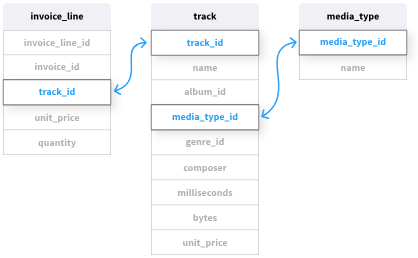

`invoice_line` and `track` relate through `track_id`

`track` and `media_type` relate through `media_type_id`


# 6) Joining and JOIN

We've been practicing adding clauses to a query like . . .

```sql
SELECT *
  FROM some_table;
```
where `some_table` is the result of a join.

As we've learned, `JOIN` is also a clause. Thus, we can also include `JOIN` in the query above. In other words, we can join more than two tables!

## Example

Let's start out with two tables. 

```sql
SELECT il.track_id, il.unit_price,
       t.name, t.media_type_id
  FROM invoice_line AS il
  JOIN track AS t
    ON t.track_id = il.track_id;
```

Think of the table above as `some_table`. We can now join `some_table` with `media_type` on `media_type_id`:

```sql
SELECT *
  FROM some_table
  JOIN media_type
    ON some_table.media_type_id = media_type.media_type_id;
```

Replacing `FROM some_table` with the code that originates it gives us...

```sql

SELECT *
  FROM invoice_line AS il
  JOIN track AS t
    ON t.track_id = il.track_id
  JOIN media_type
    ON t.media_type_id = media_type.media_type_id;
```

## Instructions

Look at the schema diagram

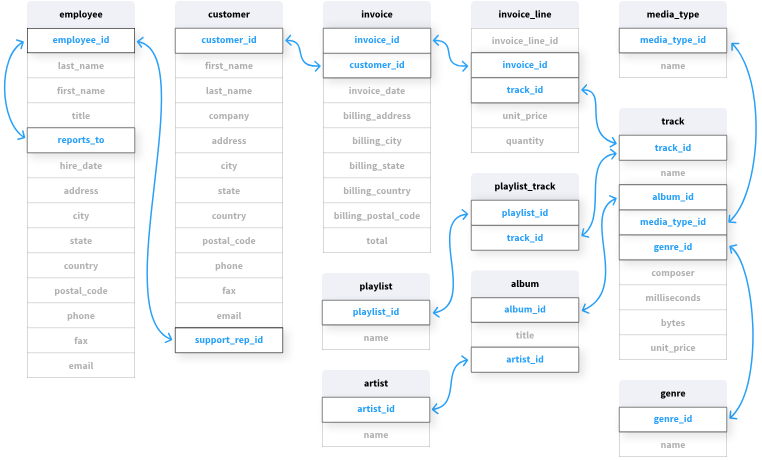

1. Write a query that, for each invoice, returns all the columns in the invoice table, plus the first name of the employee who handled that invoice.

For answer checking purposes, use invoice, customer, and employee in this order.

In [12]:
%%sql
SELECT i.*,
       e.first_name
FROM invoice as i
JOIN customer as c
    ON i.customer_id = c.customer_id
JOIN employee as e
    ON e.employee_id = c.support_rep_id --PARTIR DE INVOICE PARA EMPLOYEE (PASSANDO POR CUSTOMER NO MEIO)
LIMIT 5;




 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,first_name
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84,Jane
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9,Jane
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98,Margaret
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92,Jane
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83,Margaret


# 7) The Order of Execution (Revisited)

The correct order of execution of clauses is `FROM`, `JOIN` , `ON`, `WHERE`, `GROUP BY`, `HAVING`, `SELECT`, `ORDER BY` , `LIMIT`
